In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For better-looking plots (optional)
plt.style.use("default")


In [4]:
from google.colab import files

uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [5]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")  # change the file name if different
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [11]:
df["TotalCharges"].dtype

dtype('float64')

In [12]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
df = df.dropna()


In [14]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
df.duplicated().sum()


np.int64(0)

In [16]:
df = df.drop_duplicates()


In [17]:
df["ContractBucket"] = df["Contract"].replace({
    "Month-to-month": "Short-Term",
    "One year": "Mid-Term",
    "Two year": "Long-Term"
})


In [18]:
df[["Contract", "ContractBucket"]].head(10)


,Contract,ContractBucket
0,Month-to-month,Short-Term
1,One year,Mid-Term
2,Month-to-month,Short-Term
3,One year,Mid-Term
4,Month-to-month,Short-Term
5,Month-to-month,Short-Term
6,Month-to-month,Short-Term
7,Month-to-month,Short-Term
8,Month-to-month,Short-Term
9,One year,Mid-Term


In [19]:
df["TenureBand"] = pd.cut(
    df["tenure"],
    bins=[0, 3, 12, 24, 48, 72],
    labels=["0-3", "3-12", "12-24", "24-48", "48-72"],
    include_lowest=True
)


In [20]:
df[["tenure", "TenureBand"]].head(20)


,tenure,TenureBand
0,1,0-3
1,34,24-48
2,2,0-3
3,45,24-48
4,2,0-3
5,8,3-12
6,22,12-24
7,10,3-12
8,28,24-48
9,62,48-72


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

# **VISUALISATION 1 — Count of Churn (Yes vs No)**

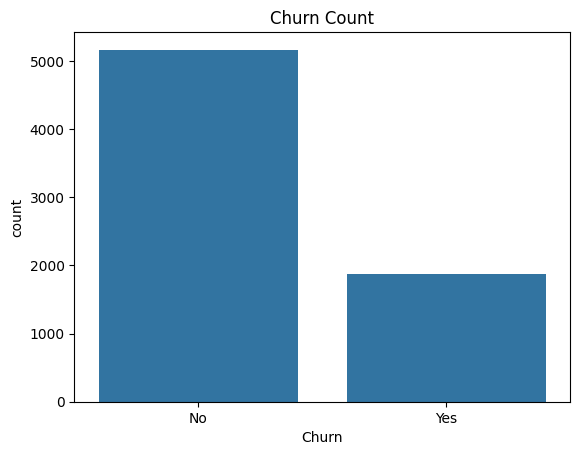

In [42]:
sns.countplot(data=df, x="Churn")
plt.title("Churn Count")
plt.show()


# **VISUALISATION 2 — Churn by Gender**

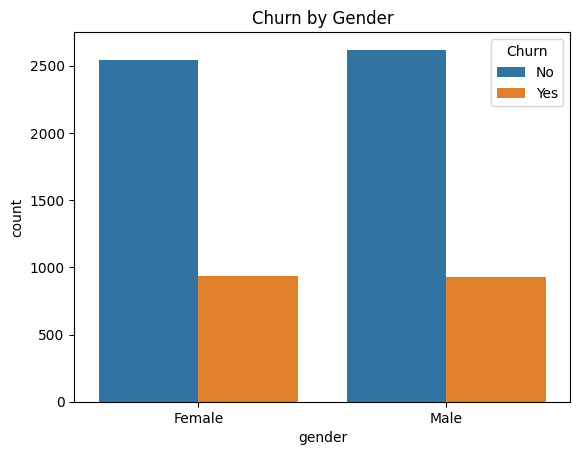

In [43]:
sns.countplot(data=df, x="gender", hue="Churn")
plt.title("Churn by Gender")
plt.show()


# **VISUALISATION 3 — Churn by Senior Citizen**

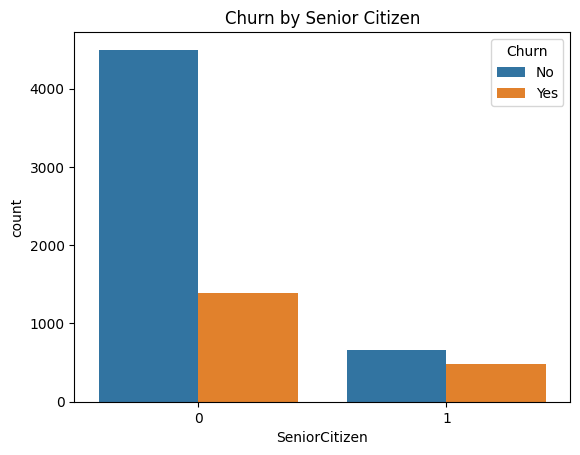

In [44]:
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.title("Churn by Senior Citizen")
plt.show()


# **VISUALISATION 4 — Monthly Charges Distribution**

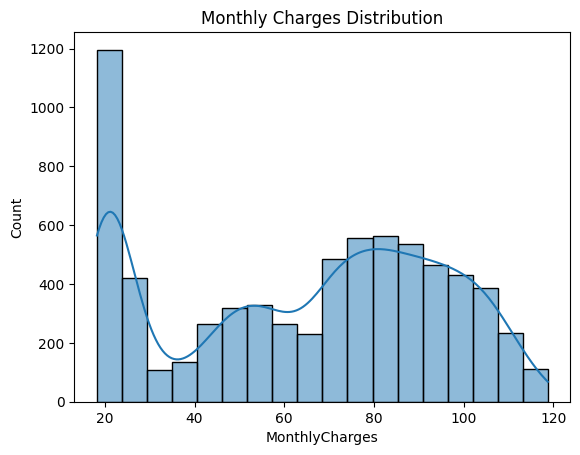

In [45]:
sns.histplot(df["MonthlyCharges"], kde=True)
plt.title("Monthly Charges Distribution")
plt.show()


# **VISUALISATION 5 — Tenure Distribution**

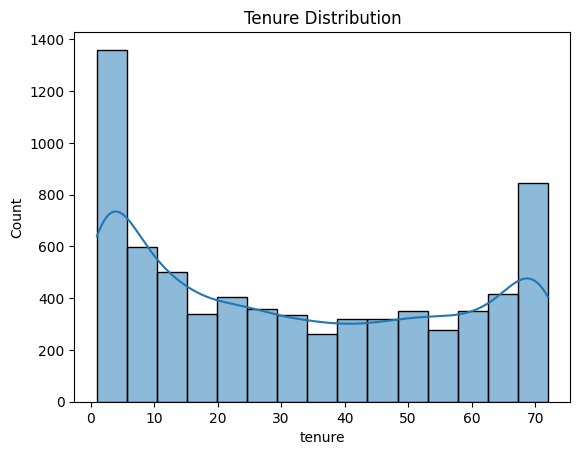

In [46]:
sns.histplot(df["tenure"], kde=True)
plt.title("Tenure Distribution")
plt.show()


# **VISUALISATION 6 — Churn by Contract Type**

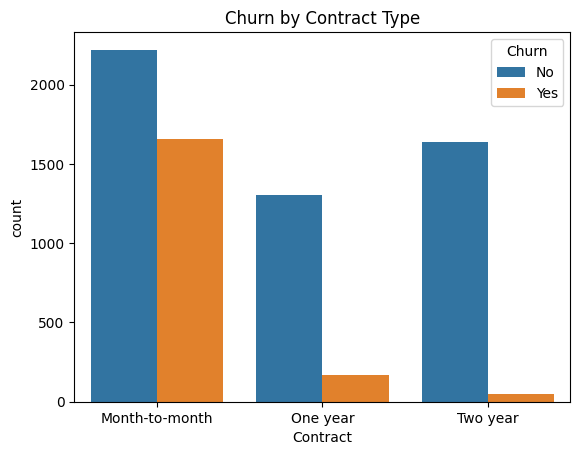

In [47]:
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")
plt.show()


# **VISUALISATION 6 — Churn by Contract Type**

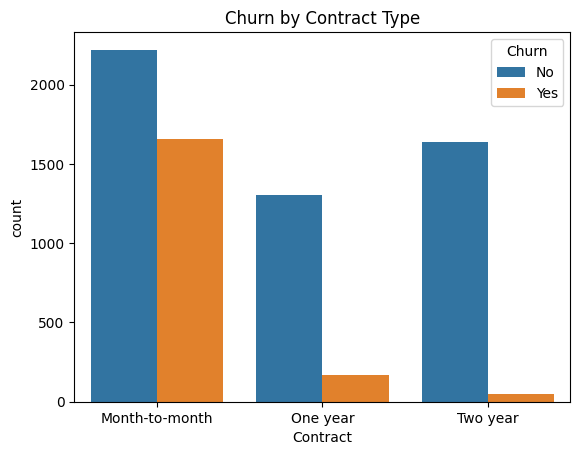

In [48]:
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")
plt.show()


# **VISUALISATION 7 — Churn by Contract Bucket**

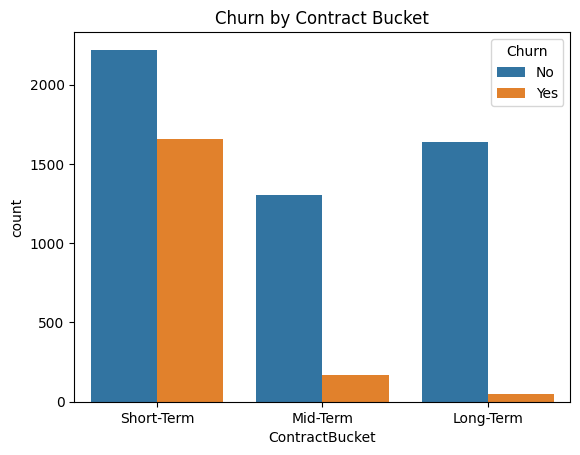

In [49]:
sns.countplot(data=df, x="ContractBucket", hue="Churn")
plt.title("Churn by Contract Bucket")
plt.show()


# **VISUALISATION 8 — Churn by Tenure Band**

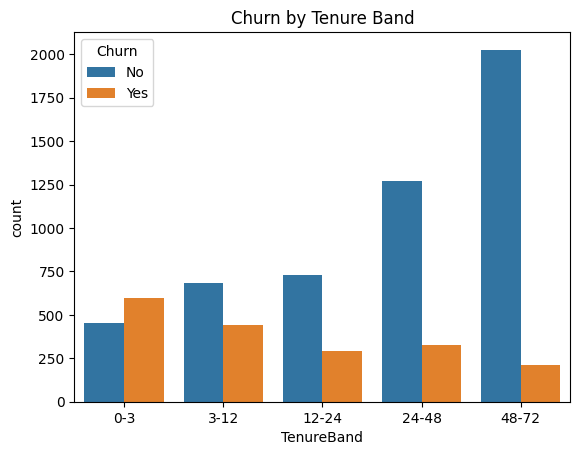

In [50]:
sns.countplot(data=df, x="TenureBand", hue="Churn")
plt.title("Churn by Tenure Band")
plt.show()


# **VISUALISATION 9 — Boxplot: Monthly Charges vs Churn**

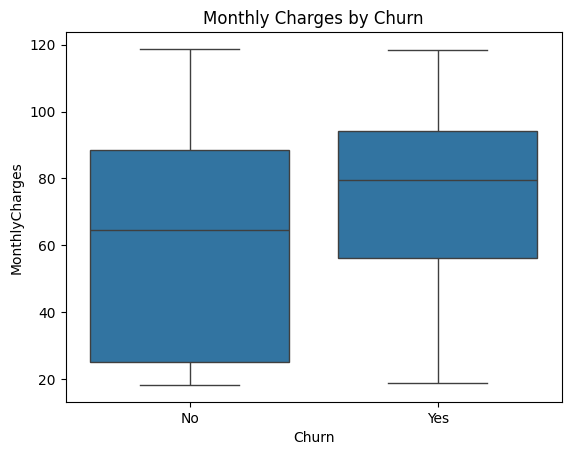

In [51]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges by Churn")
plt.show()


# **VISUALISATION 10 — Boxplot: Tenure vs Churn**

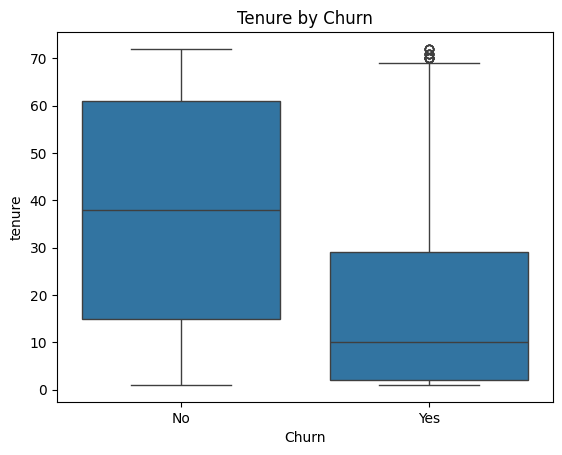

In [52]:
sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Tenure by Churn")
plt.show()


# **NOW THE FINAL INSIGHT**

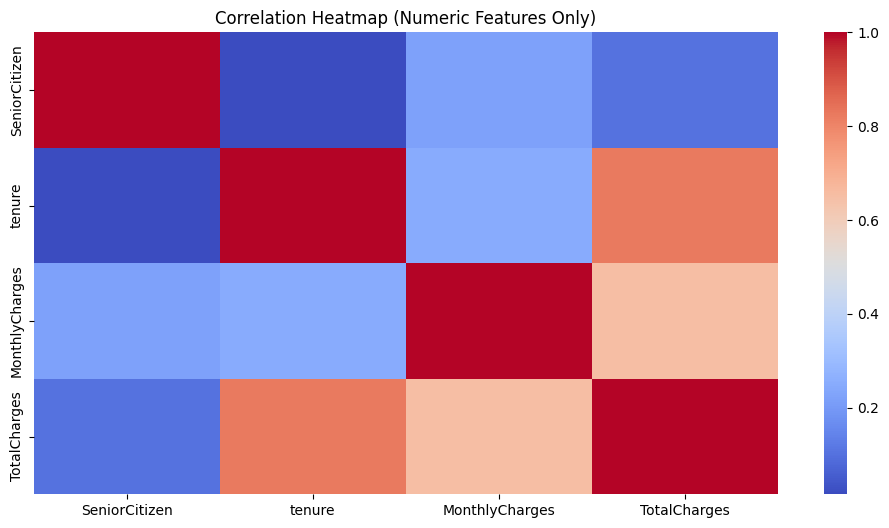

In [53]:
plt.figure(figsize=(12,6))

# 1️⃣ Keep only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# 2️⃣ Now compute correlation on numeric data only
corr_matrix = numeric_df.corr()

# 3️⃣ Plot heatmap
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [54]:
["0-3", "3-12", "12-24", ...]


['0-3', '3-12', '12-24', Ellipsis]

In [55]:
churned = df[df["Churn"]=="Yes"]

filtered = churned[
    (churned["Contract"] == "Month-to-month") &
    (churned["TenureBand"] == "0-3")
]

percentage = len(filtered) / len(churned) * 100
percentage


31.835205992509362